In [1]:
#==========加载样本数据集=============
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#读取csv文件
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [3]:
#对字符串类型数据进行编码
category_features1= [x for x in train.columns if train[x].dtype == np.object ]
category_features2= [x for x in test.columns if test[x].dtype == np.object ]

def get_mapfunction(x):
    mapp = dict(zip(x.unique().tolist(),
                  range(len(x.unique().tolist()))))
    def mapfunction(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1
    return mapfunction

for i in category_features1:
    train[i] = train[i].apply(get_mapfunction(train[i]))
for i in category_features2:
    test[i] = test[i].apply(get_mapfunction(test[i]))

#将空值和无穷全部转换为0
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(0, inplace = True)
print(train.isna().sum().any())

#划分训练集特征和标签
train_X = train.drop(['id','satisfaction'],axis = 1)
train_y = train['satisfaction']

False


In [4]:
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,0,0,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,1,25,1,1,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,0,26,1,1,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,0,25,1,1,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,0,61,1,1,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,1,23,1,2,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,0,49,1,1,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,1,30,1,1,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,1,22,1,2,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


False


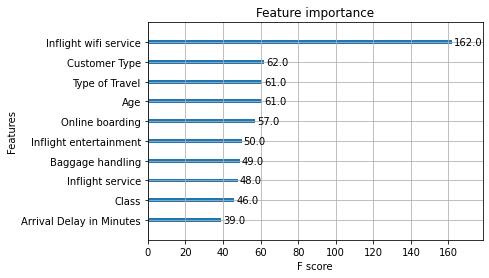

In [6]:
#===============训练xgboost模型===============
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#将空值和无穷全部转换为0
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(0, inplace = True)
print(test.isna().sum().any())

#划分测试集特征和标签
test_X = test.drop(['id','satisfaction'],axis = 1)
test_y = test['satisfaction']

#训练模型
model = XGBClassifier()
eval_set = [(test_X,test_y )]
model.fit(train_X,train_y, early_stopping_rounds=10,eval_metric=['logloss','auc','error'], eval_set=eval_set, verbose=False)

#显示重要特征
plot_importance(model,max_num_features=10)
plt.show()